In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pyclustering.cluster.clarans import clarans
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline
import tweepy
from nltk.corpus import twitter_samples
from sklearn.metrics import silhouette_samples




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (KMeans): 0.521677665485617


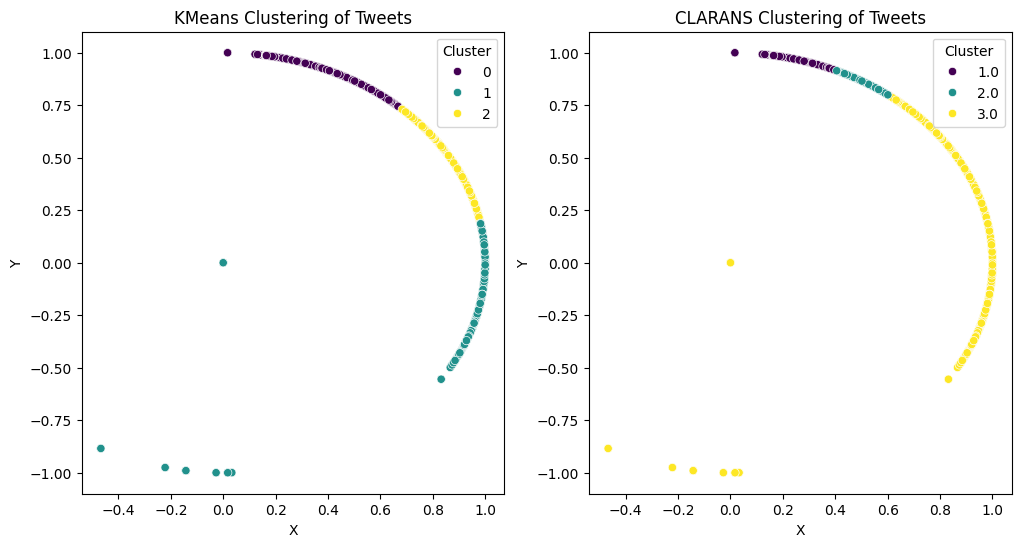

In [3]:

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Download the Twitter Corpus from NLTK
nltk.download('twitter_samples')

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine positive and negative tweets into a single list
tweets = positive_tweets + negative_tweets

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    words = word_tokenize(tweet)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets]

if not preprocessed_tweets:
    print("No meaningful words left after preprocessing. Check your data and preprocessing steps.")
    exit()

# Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(preprocessed_tweets)

# Dimensionality Reduction
n_components = 2
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Apply CLARANS
clarans_instance = clarans(X, 3, 2, 5)
clarans_instance.process()
clarans_labels = clarans_instance.get_clusters()

# Evaluation kmean
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")


# Visualization
df_kmeans = pd.DataFrame(X, columns=['X', 'Y'])
df_kmeans['Cluster'] = kmeans_labels

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', hue='Cluster', data=df_kmeans, palette='viridis')
plt.title('KMeans Clustering of Tweets')

# Visualization for CLARANS
df_clarans = pd.DataFrame(X, columns=['X', 'Y'])
df_clarans['Cluster'] = np.zeros(len(X))  # Initialize with zeros

for i, cluster in enumerate(clarans_labels):
    df_clarans.loc[cluster, 'Cluster'] = i + 1

plt.subplot(1, 2, 2)
sns.scatterplot(x='X', y='Y', hue='Cluster', data=df_clarans, palette='viridis')
plt.title('CLARANS Clustering of Tweets')

plt.show()


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Mouaz\AppData\Local\Temp\ipykernel_11212\2803923777.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='X', y='Y', data=df_before, palette='viridis')
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (KMeans): 0.5995840775159127


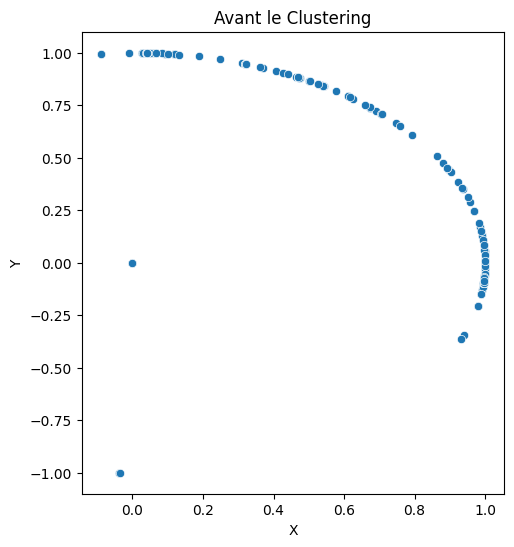

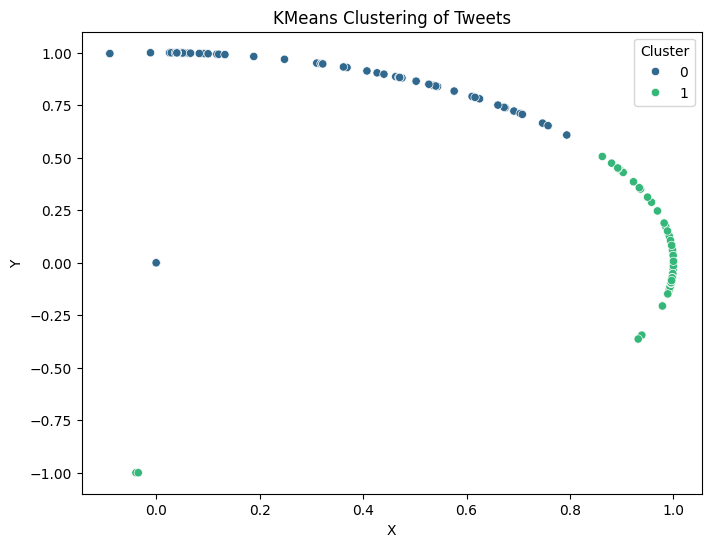

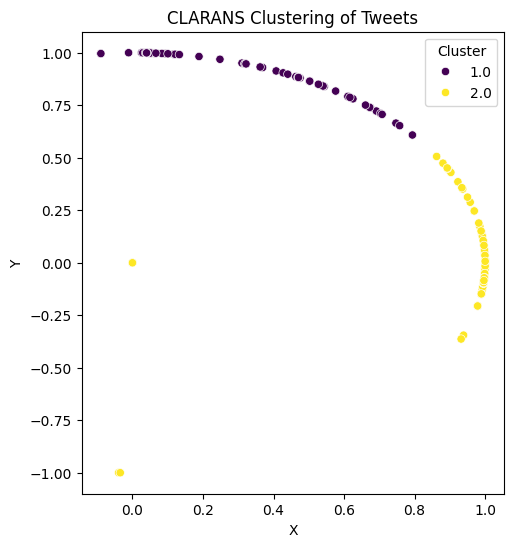

In [26]:

# Download the Twitter Corpus from NLTK
nltk.download('twitter_samples')
nltk.download('punkt')

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine positive and negative tweets into a single list
tweets = positive_tweets[:100] + negative_tweets[:100]

# Preprocess the tweets
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_tweet(tweet):
    words = word_tokenize(tweet)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words) if words else None  # Return None if all words are removed

preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets if preprocess_tweet(tweet) is not None]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(preprocessed_tweets)

# Dimensionality Reduction with LSA
n_components = 2
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)


# Visualisation avant le clustering
df_before = pd.DataFrame(X, columns=['X', 'Y'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', data=df_before, palette='viridis')
plt.title('Avant le Clustering')

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Evaluation
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")


# Apply CLARANS
clarans_instance = clarans(X, 2, 2, 5)
clarans_instance.process()
clarans_labels = clarans_instance.get_clusters()


# Visualization
df_kmeans = pd.DataFrame(X, columns=['X', 'Y'])
df_kmeans['Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', hue='Cluster', data=df_kmeans, palette='viridis')
plt.title('KMeans Clustering of Tweets')



df_clarans = pd.DataFrame(X, columns=['X', 'Y'])
df_clarans['Cluster'] = np.zeros(len(X))  # Initialize with zeros

for i, cluster in enumerate(clarans_labels):
    df_clarans.loc[cluster, 'Cluster'] = i + 1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', hue='Cluster', data=df_clarans, palette='viridis')
plt.title('CLARANS Clustering of Tweets')

plt.show()

In [7]:
positive_tweets = twitter_samples.strings('positive_tweets.json')[:100]
negative_tweets = twitter_samples.strings('negative_tweets.json')[:100]
# Combine positive and negative tweets into a single list
tweets =  negative_tweets +positive_tweets

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    words = word_tokenize(tweet)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets]
print(preprocessed_tweets)


['hopeless tmr', 'everything kids section ikea cute shame nearly 19 2 months', 'hegelbon heart sliding waste basket', 'ketchburning hate japanese call bani', 'dang starting next week work', 'oh god babies faces https', 'rileymcdonough make smile', 'f0ggstar stuartthull work neighbour motors asked said hates updates search http', 'tahuodyy sialan https', 'athabasca glacier 1948 athabasca glacier jasper jaspernationalpark alberta explorealberta http', 'really good amp g idea never going meet', 'rampageinthebox mare ivan', 'sophiamascardo happy trip keep safe see soon', 'tired hahahah', 'grumpycockney knee replacements get amp day ouch', 'relate sweet n sour kind people life cuz life full', 'pleasse', 'sexykalamo im sure tho', 'feel stupid ca seem grasp basics digital painting nothing researching helping', 'good lord https', 'feel lonely someone talk guys girls theonlyrazzyt imarieuda eirozpegasus amysquee udotv', 'assignment project really', 'want play video movies someone', 'choreograph

C:\Users\Mouaz\AppData\Local\Temp\ipykernel_9296\4177146298.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='X', y='Y', data=df_before, palette='viridis')
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (KMeans): 0.5982203024289985
Silhouette Score (Clarans): 0.5982203024289985


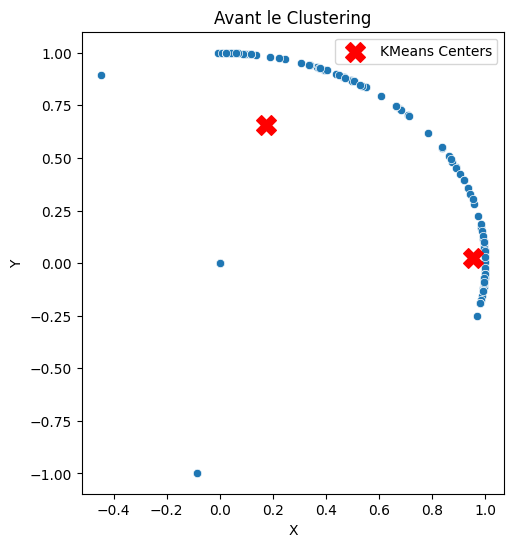

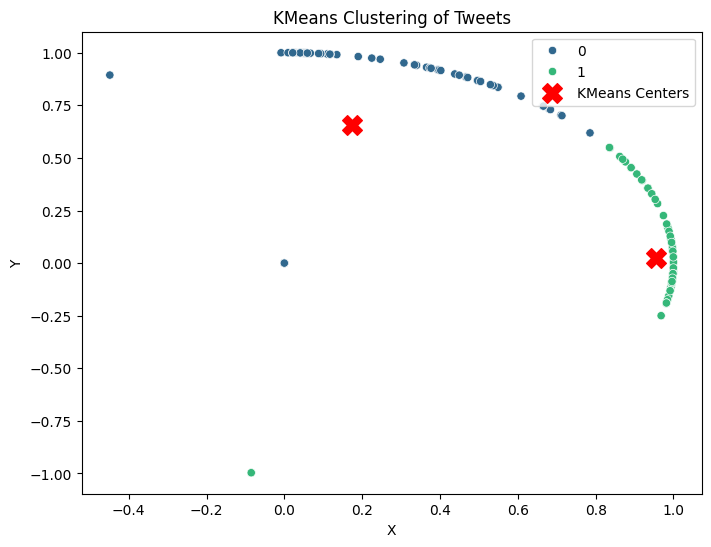

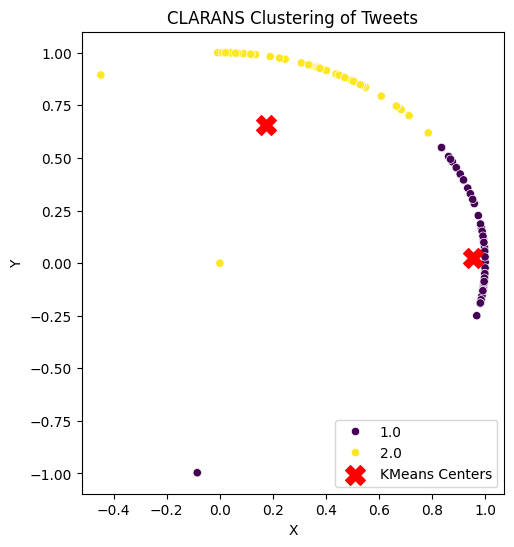

In [6]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(preprocessed_tweets)

# Dimensionality Reduction with LSA
n_components = 2
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)


# Visualisation avant le clustering
df_before = pd.DataFrame(X, columns=['X', 'Y'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', data=df_before, palette='viridis')
plt.title('Avant le Clustering')

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
# Récupération des centres des clusters KMeans
kmeans_cluster_centers = kmeans.cluster_centers_

# Affichage des centres des clusters KMeans
plt.scatter(kmeans_cluster_centers[:, 0], kmeans_cluster_centers[:, 1], c='red', marker='X', s=200, label='KMeans Centers')
plt.legend()

# Evaluation kmeans
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")


# Apply CLARANS
clarans_instance = clarans(X, 2, 2, 5)
clarans_instance.process()
clarans_labels = clarans_instance.get_clusters()


# Evaluation Clarans
clusters= np.zeros(len(X),dtype=int)
for i, cluster_ind in enumerate(clarans_labels):
    clusters[cluster_ind]=i
silhouette_clarans = silhouette_score(X, clusters)
print(f"Silhouette Score (Clarans): {silhouette_clarans}")

# Visualization
df_kmeans = pd.DataFrame(X, columns=['X', 'Y'])
df_kmeans['Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', hue='Cluster', data=df_kmeans, palette='viridis')
plt.title('KMeans Clustering of Tweets')
# Récupération des centres des clusters KMeans
kmeans_cluster_centers = kmeans.cluster_centers_

# Affichage des centres des clusters KMeans
plt.scatter(kmeans_cluster_centers[:, 0], kmeans_cluster_centers[:, 1], c='red', marker='X', s=200, label='KMeans Centers')
plt.legend()


df_clarans = pd.DataFrame(X, columns=['X', 'Y'])
df_clarans['Cluster'] = np.zeros(len(X))  # Initialize with zeros

for i, cluster in enumerate(clarans_labels):
    df_clarans.loc[cluster, 'Cluster'] = i + 1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', hue='Cluster', data=df_clarans, palette='viridis')
plt.title('CLARANS Clustering of Tweets')

# Récupération des centres des clusters KMeans
kmeans_cluster_centers = kmeans.cluster_centers_

# Affichage des centres des clusters KMeans
plt.scatter(kmeans_cluster_centers[:, 0], kmeans_cluster_centers[:, 1], c='red', marker='X', s=200, label='KMeans Centers')
plt.legend()
plt.show()